In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [3]:
df.drop(['society', 'availability'], axis=1, inplace=True)
df['BHK'] = df['size'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else None)
df['total_sqft'] = df['total_sqft'].apply(lambda x: np.mean([float(i) for i in x.split('-')]) if '-' in str(x) else x)
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

df.dropna(inplace=True)

In [4]:
def classify_price(price):
    if price < 50:
        return 'Low'
    elif price <= 100:
        return 'Medium'
    else:
        return 'High'

df['price_segment'] = df['price'].apply(classify_price)

In [5]:
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['area_type'] = le.fit_transform(df['area_type'])

In [6]:
X = df[['location', 'total_sqft', 'bath', 'balcony', 'BHK', 'area_type']]
y = df['price_segment']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

        High       0.78      0.80      0.79       736
         Low       0.70      0.71      0.70       637
      Medium       0.72      0.71      0.71      1161

    accuracy                           0.73      2534
   macro avg       0.74      0.74      0.74      2534
weighted avg       0.73      0.73      0.73      2534



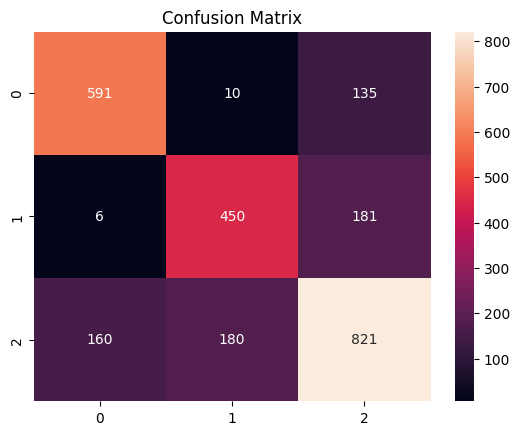

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()